<a href="https://colab.research.google.com/github/01danl/Astana-Housing-Dashboard/blob/main/krisha_astana_full_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('krisha_astana_rentals.csv')

In [50]:
df.head()

,Rooms,Area,Floor,District,Price,Address,Details
0,4,178.6 м²,2/6 этаж,Есильский р-н,90 000 000〒,"мкр Комсомольский, Умай Ана 8","жил. комплекс Comfort House, кирпичный дом, 20..."
1,3,85 м²,3/8 этаж,Есильский р-н,67 500 000〒,Мәңгілік Ел 42а,"В залоге, жил. комплекс Aq-Tay, кирпичный дом,..."
2,2,54.91 м²,6/12 этаж,Сарыарка р-н,18 120 300〒,Бейбарыс Султан б/н,"жил. комплекс Rio de Janeiro, кирпичный дом, 2..."
3,2,68 м²,9/16 этаж,Есильский р-н,41 900 000〒,Әнет баба 9/1,"жил. комплекс ONER, монолитный дом, 2022 г.п.,..."
4,2,42.1 м²,5/12 этаж,Сарыарка р-н,21 000 000〒,Чингиз Айтматов 77/10,"жил. комплекс Qaiyndy, кирпичный дом, 2025 г.п..."


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rooms     1583 non-null   int64 
 1   Area      1583 non-null   object
 2   Floor     1226 non-null   object
 3   District  1583 non-null   object
 4   Price     1583 non-null   object
 5   Address   1542 non-null   object
 6   Details   1583 non-null   object
dtypes: int64(1), object(6)
memory usage: 86.7+ KB


In [52]:
df.shape

(1583, 7)

In [53]:
df.describe()

,Rooms
count,1583.000000
mean,2.260265
std,0.956305
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,8.000000


In [54]:
df.isnull().sum()

,0
Rooms,0
Area,0
Floor,357
District,0
Price,0
Address,41
Details,0


In [55]:
df = df.dropna(subset=['Floor'])

In [56]:
def remove_currency(price):
  if pd.isna(price):
    return np.nan
  str_price = str(price)
  return int(str_price.replace('〒', "").replace('\xa0', ""))

In [57]:
df['Price'] = df['Price'].apply(remove_currency)
print(df['Price'])

0        90000000
1        67500000
2        18120300
3        41900000
4        21000000
          ...    
1574     18900000
1575     21900000
1576     86000000
1577    103000000
1582     29700000
Name: Price, Length: 1226, dtype: int64


/tmp/ipython-input-57-1936545266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].apply(remove_currency)


In [58]:
def clean_m(Area):
  if pd.isna(Area):
    return np.nan

  Area_str = str(Area)
  return float(Area_str.replace('м²', ''))
df['Area'] = df['Area'].apply(clean_m)
df['Area']

/tmp/ipython-input-58-3514649244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = df['Area'].apply(clean_m)


,Area
0,178.60
1,85.00
2,54.91
3,68.00
4,42.10
...,...
1574,46.00
1575,36.00
1576,100.10
1577,198.00


In [59]:
df.drop('Floor', axis=1, inplace=True)

/tmp/ipython-input-59-1114392982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Floor', axis=1, inplace=True)


In [60]:
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Area'] = df['Area'].fillna(df['Area'].median())

/tmp/ipython-input-60-5589561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].fillna(df['Price'].median())
/tmp/ipython-input-60-5589561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = df['Area'].fillna(df['Area'].median())


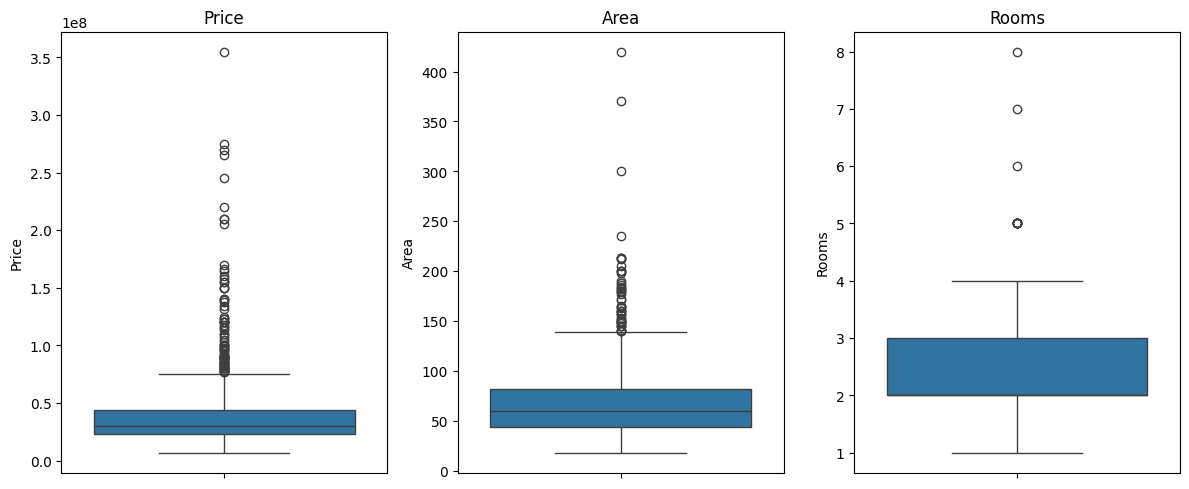

Size of data after rem.: (1109, 6)


In [61]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.boxplot(y=df['Price'])
plt.title('Price')

plt.subplot(1,3,2)
sns.boxplot(y=df['Area'])
plt.title('Area')

plt.subplot(1,3,3)
sns.boxplot(y=df['Rooms'])
plt.title('Rooms')

plt.tight_layout()
plt.show(
)
for col in ['Price', 'Area']:
    q_low = df[col].quantile(0.025)
    q_high = df[col].quantile(0.975)
    df = df[(df[col] >= q_low) & (df[col] <= q_high)]

print("Size of data after rem.:", df.shape)

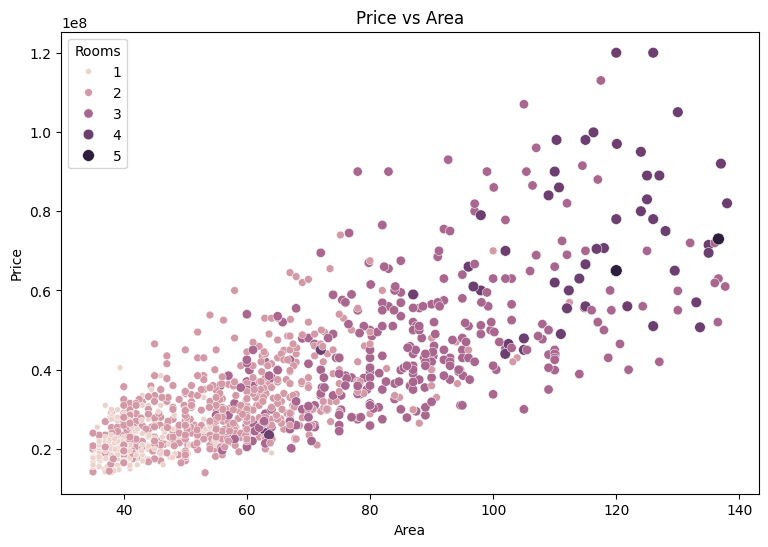

In [62]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Area', y='Price', hue='Rooms', size='Rooms', data=df)
plt.title('Price vs Area')
plt.show()

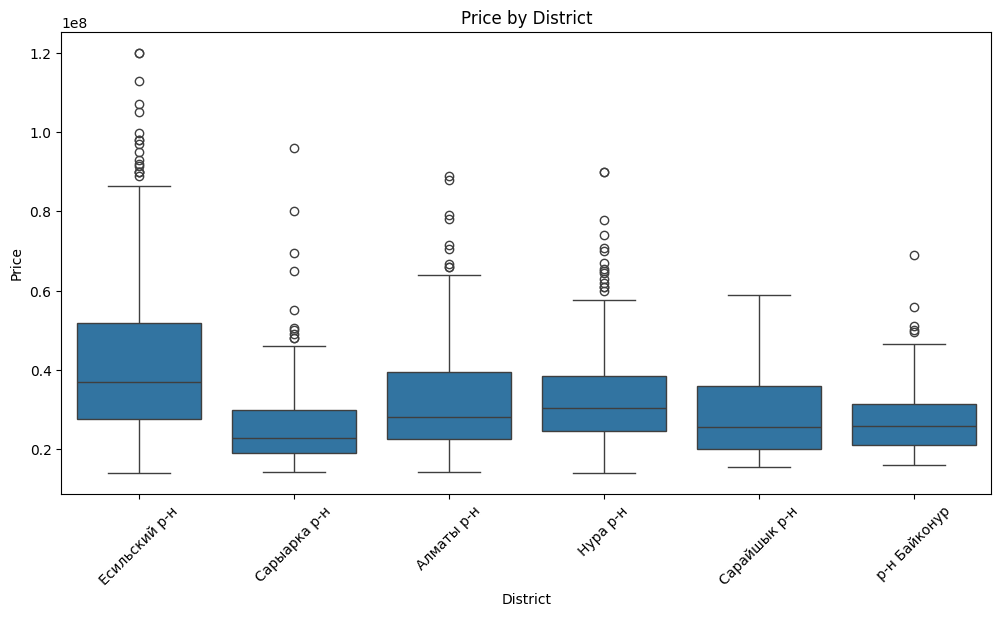

In [63]:
p_districts = ['Есильский р-н', 'Сарыарка р-н', 'Алматы р-н', 'Нура р-н', 'Сарайшык р-н', 'р-н Байконур']
filltered_districts = df[df['District'].isin(p_districts)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='District', y='Price', data=filltered_districts)
plt.xticks(rotation=45)
plt.title('Price by District')
plt.show()

In [64]:
df_enc = pd.get_dummies(df, columns=['District'], drop_first=False)
df_enc = df_enc.drop(['Address', 'Details'], axis=1)

In [65]:
from sklearn.model_selection import train_test_split
X = df_enc.drop('Price', axis=1)
y = df_enc['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
df.to_csv('processed_data.csv', index=False)

In [68]:
#Model (Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print(f"RMSE: {rmse}")
r2 = r2_score(y_pred, y_test)
print(f"R^2: {r2}")
#P.S: I know about RMSE, it's very bad, i guess it's temporary until I don't solve this problem

RMSE: 9091142.021618856
R^2: 0.5101263121277004
